In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, decode_str_columns
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
from astropy.coordinates import SkyCoord
import astropy.coordinates 
import astropy.units as u
import astroquery
import sklearn
from sklearn import model_selection

%matplotlib inline

matplotlib settings set


matplotlib settings set


In [3]:
class_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_xmatch_simbad.gz_pkl', compression='gzip')
class_df

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_g_r,rel_g_z,rel_r_z,all_g_r,all_g_z,all_r_z,dered_g_r,dered_g_z,dered_r_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_g_w1,rel_r_w1,rel_z_w1,rel_g_w2,rel_r_w2,rel_z_w2,rel_w1_w2,rel_w2_w3,vega_w1_w2,vega_w2_w3,rel_w1_w3,rel_w1_w4,vega_w1_w3,vega_w1_w4,lg(Fx/Fo_g),lg(Fx/Fo_r),lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z_corr),rel_dered_lg(Fx/Fo_g),rel_dered_lg(Fx/Fo_r),is_gaia_star,OTYPE_rough_fin,class_4,extended,zorder
7963,SRGe J105433.6+562845,163.640190,56.479156,150.236375,54.007720,5.484931,62.062992,1.949096e-14,3.363606e-15,46.088207,7.953562,2160.250000,0.0,0.0,0.0,2355,1860,163.642199,56.477867,2.300617,75.108620,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.021335,0.003682,10.767665,163.640190,56.479156,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,15.997000,15.285,12.436,21.7,14.2,2.5,1,2,0,1237657771787551132,0,5.511638,68575083462,2.300617,1.9609

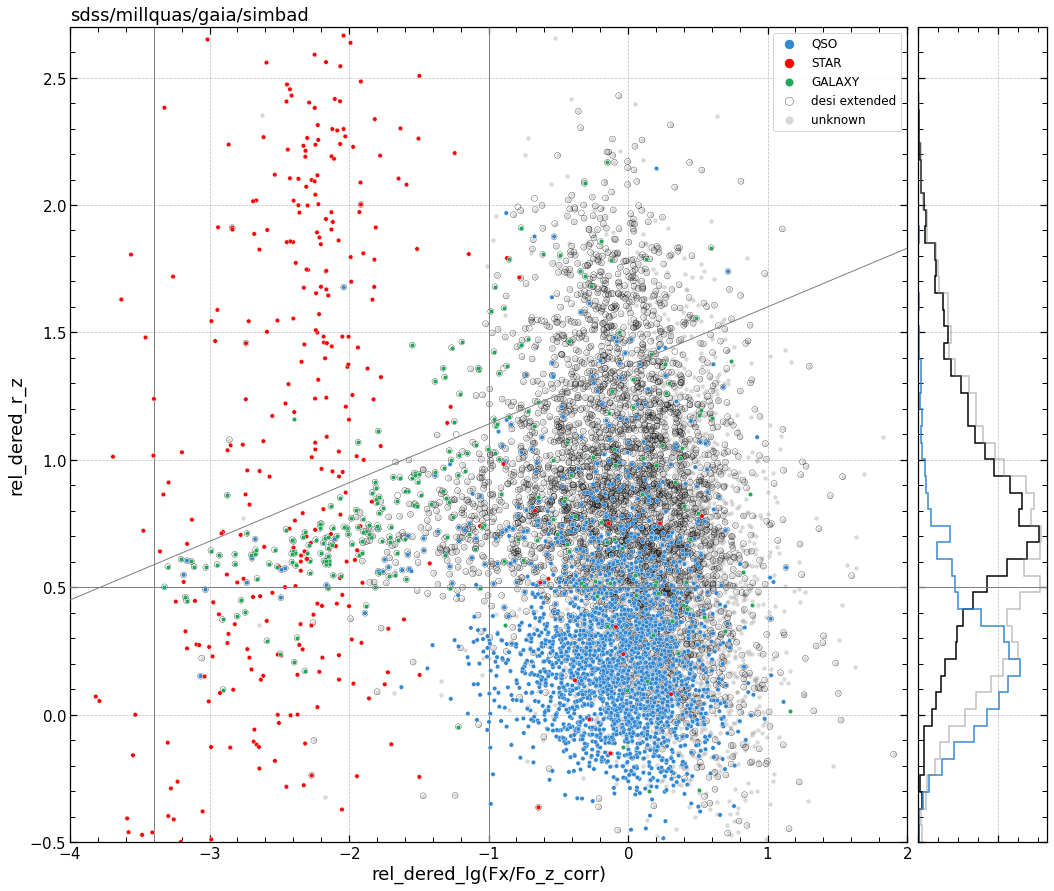

In [32]:

def upper(x):
    return .23*x + 1.37

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

xlims = np.array([-4, 2])
ylims = [-.5, 2.7]

x='rel_dered_lg(Fx/Fo_z_corr)'
y='rel_dered_r_z'

unknown_df = class_df[class_df['class_4']=='unknown']
galaxy_df = class_df[class_df['class_4']=='GALAXY']
qso_star_df = class_df[class_df['class_4'].isin(['QSO', 'STAR'])]
qso_df = class_df[class_df['class_4']=='QSO']
extended_df = class_df.query('desi_type != "PSF"')

hue_args = {'hue': 'class_4',
            'hue_order':[
                'QSO', 'STAR'
                ],
            'palette': {
                'QSO': 'C0',
                'STAR': 'r'
                }
            }

# Scatterplots
sns.scatterplot(
    data=unknown_df, x=x, y=y, ax=ax, s=20, color='gray',
    zorder=1, alpha=.3, label='unknown'
    )
sns.scatterplot(
    data=extended_df, x=x, y=y, ax=ax, s=35, color='none', edgecolor='k',
    linewidth=.3, zorder=2, alpha=1, label='desi extended'
    )
sns.scatterplot(
    data=qso_star_df, x=x, y=y, ax=ax, s=20, **hue_args, zorder=3
    )
sns.scatterplot(
    data=galaxy_df, x=x, y=y, ax=ax, s=20, color='C2',
    zorder=4, label='GALAXY'
    )

ax.set_ylim(ylims[0], ylims[1])
ax.set_xlim(*xlims)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 3, 4, 1, 0]
lgnd = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order],
    frameon=True, loc='upper right', fontsize=12
)
for handle in lgnd.legendHandles:
    handle._sizes = [70]

ax.plot(xlims, upper(xlims), color='gray', zorder=4, lw=1)
ax.axhline(y=.5, color='gray', zorder=4, lw=1)
[ax.axvline(_x, lw=1, color='gray') for _x in [-3.4, -1]]

# Histograms
rect_histy = [.91, .125, .12, .755]
ax_histy = fig.add_axes(rect_histy)
color_bin_edges = np.linspace(*ylims, 50)
ax_histy.hist(
    extended_df[y], orientation='horizontal', color='k',
    histtype='step', lw=1.5, bins=color_bin_edges
    )
ax_histy.hist(
    qso_df[y], orientation='horizontal', color='C0',
    histtype='step', lw=1.5, bins=color_bin_edges
    )
ax_histy.hist(
    unknown_df[y], orientation='horizontal', color='gray',
    histtype='step', lw=1.5, alpha=.5, bins=color_bin_edges
    )
ax_histy.axhline(y=.5, color='gray', linewidth=1)
ax_histy.set_ylim(*ylims)
ax_histy.set_yticklabels([])
ax_histy.set_xticklabels([])

ax.set_title('sdss/millquas/gaia/simbad')

plt.show()

<Figure size 1080x1080 with 0 Axes>

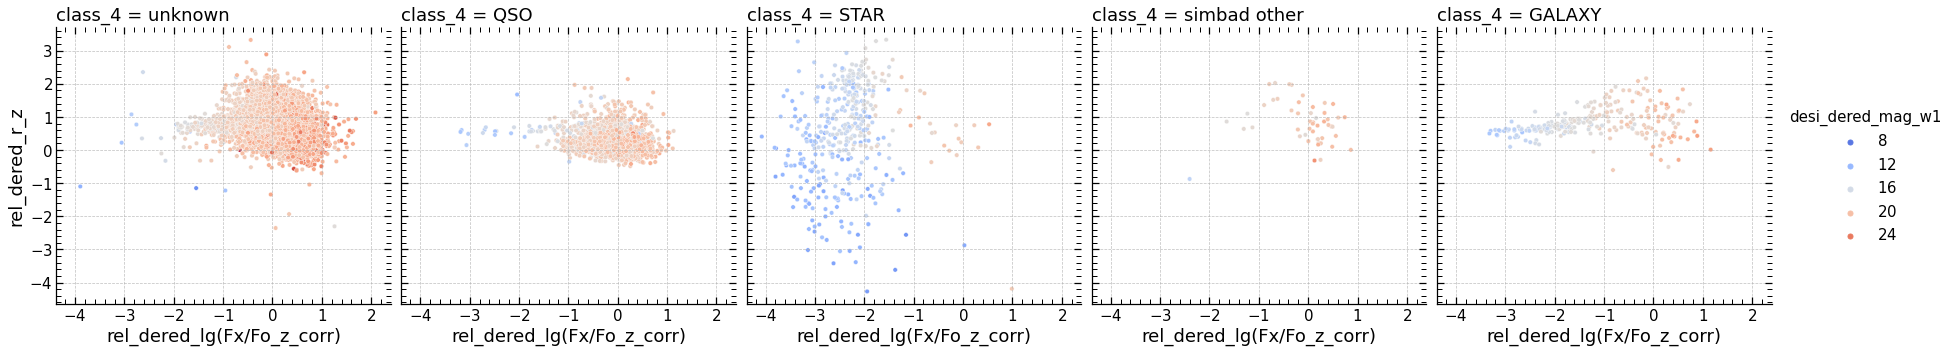

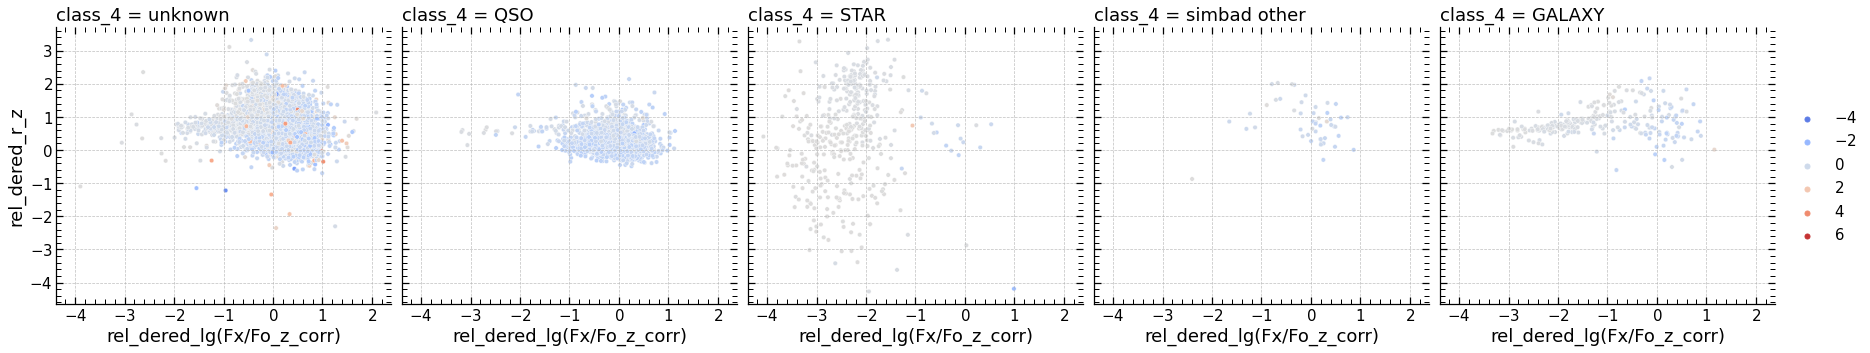

In [53]:
plt.figure(figsize=(15, 15))

sns.relplot(data = class_df, x='rel_dered_lg(Fx/Fo_z_corr)', y='rel_dered_r_z', hue='desi_dered_mag_w1', col = 'class_4',  s=20, palette = 'coolwarm')
sns.relplot(data = class_df, x='rel_dered_lg(Fx/Fo_z_corr)', y='rel_dered_r_z', hue=class_df.desi_dered_mag_w2-class_df.desi_dered_mag_w1, col = 'class_4',  s=20, palette = 'coolwarm')



<AxesSubplot:xlabel='rel_dered_lg(Fx/Fo_z_corr)', ylabel='rel_dered_r_z'>

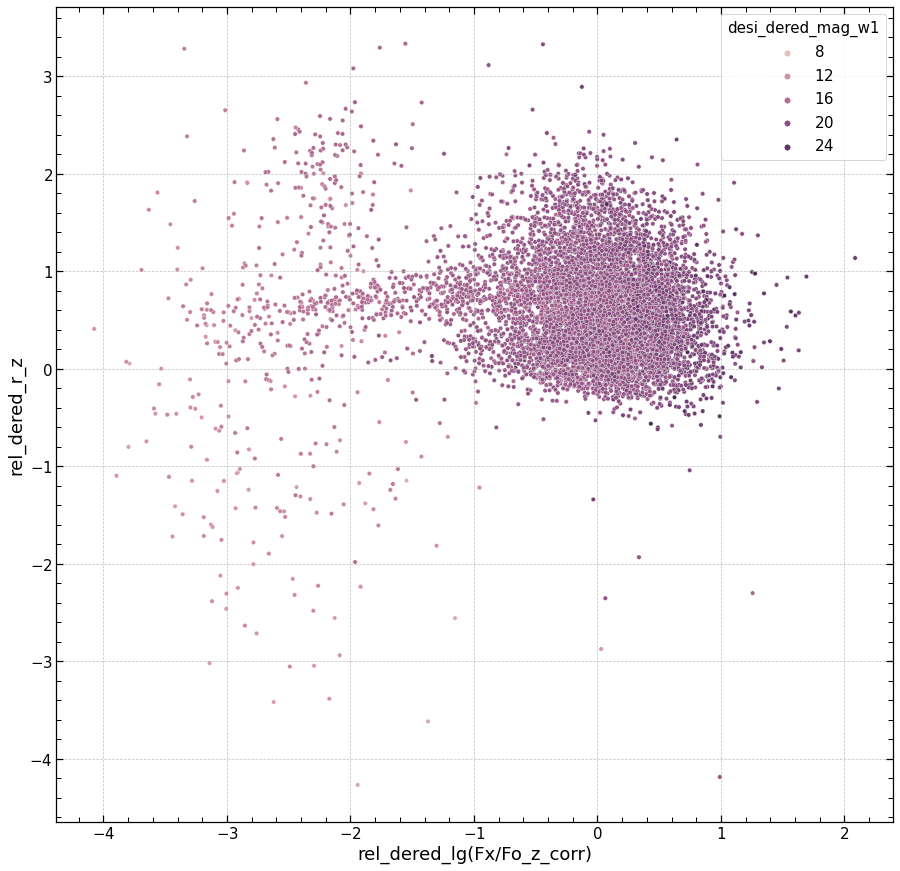

In [44]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data = class_df, x='rel_dered_lg(Fx/Fo_z_corr)', y='rel_dered_r_z', hue='desi_dered_mag_w1', s=20)

<AxesSubplot:ylabel='Density'>

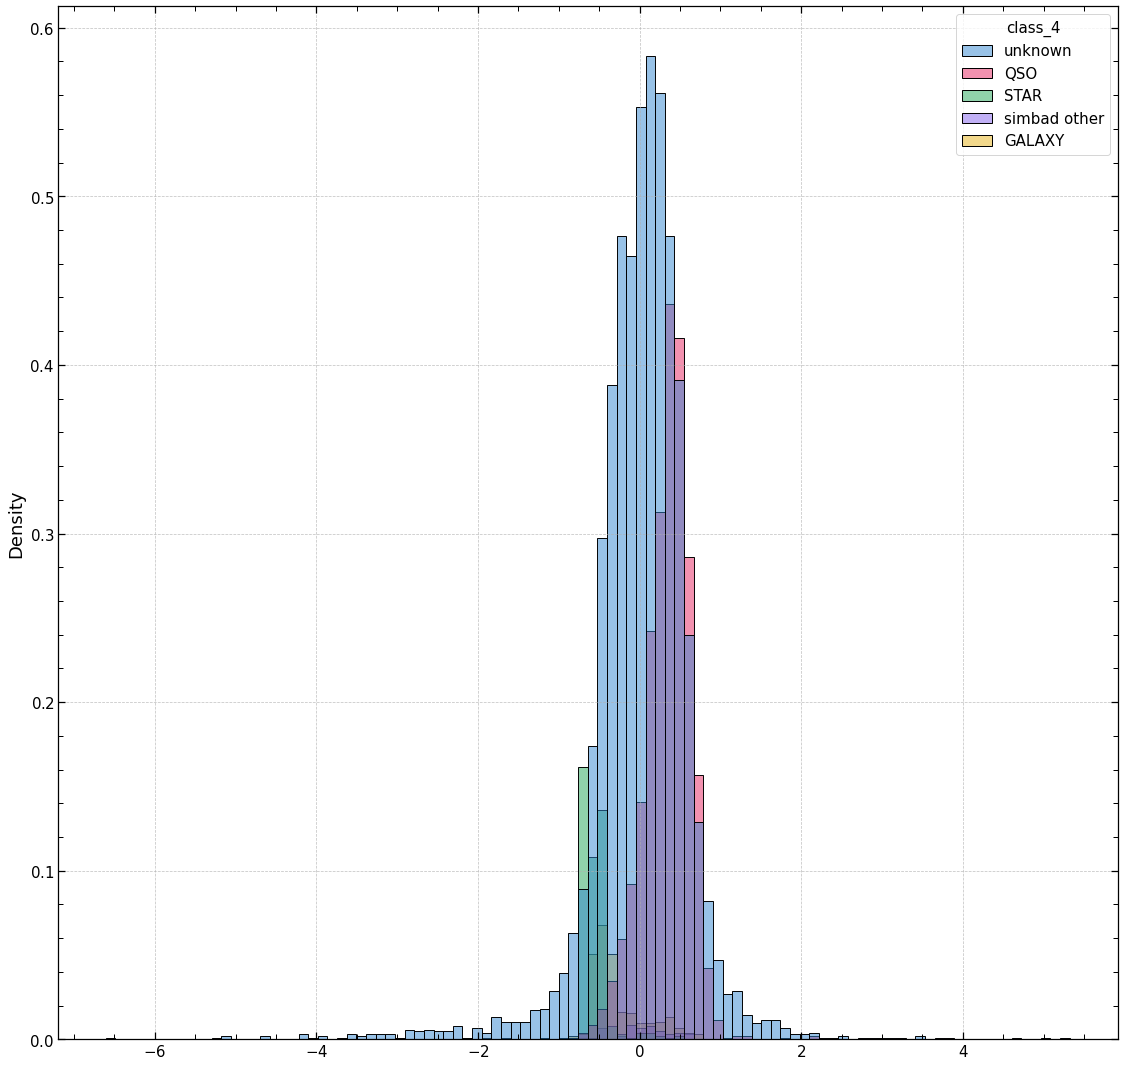

In [39]:
plt.figure(figsize=(19, 19))
sns.histplot(data = class_df, x = class_df.desi_dered_mag_w1-class_df.desi_dered_mag_w2, hue = 'class_4', bins = 100, stat='density')

In [34]:
class_df

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_g_r,rel_g_z,rel_r_z,all_g_r,all_g_z,all_r_z,dered_g_r,dered_g_z,dered_r_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_g_w1,rel_r_w1,rel_z_w1,rel_g_w2,rel_r_w2,rel_z_w2,rel_w1_w2,rel_w2_w3,vega_w1_w2,vega_w2_w3,rel_w1_w3,rel_w1_w4,vega_w1_w3,vega_w1_w4,lg(Fx/Fo_g),lg(Fx/Fo_r),lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z_corr),rel_dered_lg(Fx/Fo_g),rel_dered_lg(Fx/Fo_r),is_gaia_star,OTYPE_rough_fin,class_4,extended,zorder
7963,SRGe J105433.6+562845,163.640190,56.479156,150.236375,54.007720,5.484931,62.062992,1.949096e-14,3.363606e-15,46.088207,7.953562,2160.250000,0.0,0.0,0.0,2355,1860,163.642199,56.477867,2.300617,75.108620,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.021335,0.003682,10.767665,163.640190,56.479156,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,15.997000,15.285,12.436,21.7,14.2,2.5,1,2,0,1237657771787551132,0,5.511638,68575083462,2.300617,1.9609

In [62]:
class_df.query("srcname_fin=='SRGe J104440.2+564629'")    

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_g_r,rel_g_z,rel_r_z,all_g_r,all_g_z,all_r_z,dered_g_r,dered_g_z,dered_r_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_g_w1,rel_r_w1,rel_z_w1,rel_g_w2,rel_r_w2,rel_z_w2,rel_w1_w2,rel_w2_w3,vega_w1_w2,vega_w2_w3,rel_w1_w3,rel_w1_w4,vega_w1_w3,vega_w1_w4,lg(Fx/Fo_g),lg(Fx/Fo_r),lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z_corr),rel_dered_lg(Fx/Fo_g),rel_dered_lg(Fx/Fo_r),is_gaia_star,OTYPE_rough_fin,class_4,extended,zorder
5108,SRGe J104440.2+564629,161.167545,56.774598,151.353611,52.785649,7.847293,19.265366,5.822403e-15,1.473539e-15,26.805456,6.783948,4205.991699,0.0,0.0,0.0,5436,4448,161.169554,56.773308,3.406071,68.951591,0.000009,6.268413e+08,6.270701e+08,0.0,0.0,0.006373,0.001613,17.504147,161.167545,56.774598,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.0,0,0,0,0,17.171,17.044001,12.882,10.0,3.3,-1.2,1,2,0,1237658302205329924,0,6.09689,67404663033,3.406071,2.805461,4.235102

In [59]:
tmp = class_df.query('class_4 == "unknown" & `rel_dered_lg(Fx/Fo_z_corr)`>=-1 & extended==True').sample(5)[['desi_ra', 'desi_dec', 'desi_id', 'desi_type', 'srcname_fin',  'RA_fin', 'DEC_fin']]
def gen_url(ra,dec, ero_ra, ero_dec, zoom = 16):
    #return f"https://www.legacysurvey.org/viewer/?ra={ra}&dec={dec}&zoom={16}&mark={ra},{dec}"
    return f"https://www.legacysurvey.org/viewer/?ra={ra}&dec={dec}&zoom={16}&mark={ra},{dec};{ero_ra},{ero_dec}"

for i in tmp.index:
    print(tmp.loc[i])
    print(gen_url(tmp.loc[i]['desi_ra'], tmp.loc[i]['desi_dec'], tmp.loc[i]['RA_fin'], tmp.loc[i]['DEC_fin']))
    print('======='*3)

desi_ra                   161.169315
desi_dec                    56.77555
desi_id             9011_607589_1706
desi_type                        REX
srcname_fin    SRGe J104440.2+564629
RA_fin                    161.167545
DEC_fin                    56.774598
Name: 5108, dtype: object
https://www.legacysurvey.org/viewer/?ra=161.16931452402443&dec=56.77555024994994&zoom=16&mark=161.16931452402443,56.77555024994994;161.16754493516405,56.77459776974997
desi_ra                   165.504836
desi_dec                   58.465385
desi_id             9011_613023_2304
desi_type                        REX
srcname_fin    SRGe J110200.7+582753
RA_fin                     165.50293
DEC_fin                    58.464715
Name: 8961, dtype: object
https://www.legacysurvey.org/viewer/?ra=165.50483608666948&dec=58.46538479658237&zoom=16&mark=165.50483608666948,58.46538479658237;165.50293047264998,58.464714908843746
desi_ra                   161.059344
desi_dec                   54.711077
desi_id            

In [41]:
class_df.query('desi_id=="9011_604372_3615"')

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_g_r,rel_g_z,rel_r_z,all_g_r,all_g_z,all_r_z,dered_g_r,dered_g_z,dered_r_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_g_w1,rel_r_w1,rel_z_w1,rel_g_w2,rel_r_w2,rel_z_w2,rel_w1_w2,rel_w2_w3,vega_w1_w2,vega_w2_w3,rel_w1_w3,rel_w1_w4,vega_w1_w3,vega_w1_w4,lg(Fx/Fo_g),lg(Fx/Fo_r),lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z_corr),rel_dered_lg(Fx/Fo_g),rel_dered_lg(Fx/Fo_r),is_gaia_star,OTYPE_rough_fin,class_4,extended,zorder
4149,SRGe J104153.8+554834,160.474069,55.809355,153.00512,53.083989,10.288297,12.104068,4.705716e-15,1.404301e-15,22.152168,6.610748,4300.688965,0.0,0.0,0.0,5964,4922,160.476077,55.808066,4.52419,130.204636,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.005151,0.001537,18.595411,160.474069,55.809355,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.0,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1237657771786698885,0,5.063189,71259879209,4.52419,3.678136,5.552485,9.003145,136